Machine Learning Final Project

-- Pre Processing Data

In [12]:
!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [18]:
df = pd.read_csv('/Users/arianaelahi/Desktop/ML FINAL PROJECT DATA/student/student-mat.csv', sep=';')
print(df.head())
# had to seperate by ; instead of the default , bc that is standard practice is european countries

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [19]:
# Data Cleaning and preprocessing

# Drop G1 and G2 to avoid data leakage
df = df.drop(columns=['G1', 'G2'])

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

print(df.head())



   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   
2    0   15        1        0        1     1     1           1          2   
3    0   15        1        1        1     4     2           1          3   
4    0   16        1        1        1     3     3           1          2   

   failures  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0         0  ...         False        False       False          False   
1         0  ...         False        False        True          False   
2         3  ...         False        False        True          False   
3         0  ...         False        False       False           True   
4         0  ...         False        False        True          False   

   Fjob_teacher  reason_home  reason_other  reason_reputation  \
0          True        Fals

In [20]:
# standardization for Z-score

# Define X and y
X = df.drop(columns=['G3'])  # Features
y = df['G3']                 # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and train the model
regressor = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
regressor.fit(X_train_scaled, y_train)

# Predict
y_pred_reg = regressor.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 14.89
R² Score: 0.27


In [28]:
def convert_to_letter_grade(g):
    if g >= 15:
        return 'A'
    elif g >= 13:
        return 'B'
    elif g >= 10:
        return 'C'
    elif g >= 8:
        return 'D'
    else:
        return 'F'

# Apply to target
y_letter = y.apply(convert_to_letter_grade)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the new target
X_train, X_test, y_train, y_test = train_test_split(X, y_letter, test_size=0.2, random_state=42)

# Scale again if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
clf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           A       0.60      0.30      0.40        20
           B       0.00      0.00      0.00        11
           C       0.32      0.90      0.47        21
           D       0.50      0.09      0.15        11
           F       0.43      0.19      0.26        16

    accuracy                           0.37        79
   macro avg       0.37      0.30      0.26        79
weighted avg       0.39      0.37      0.30        79



<Figure size 600x500 with 0 Axes>

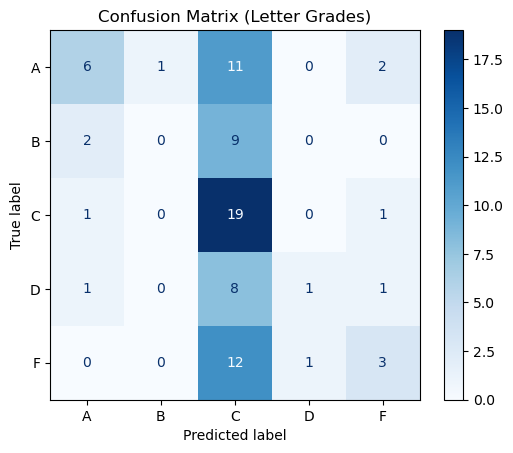

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C', 'D', 'F'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C', 'D', 'F'])

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Letter Grades)")
plt.show()


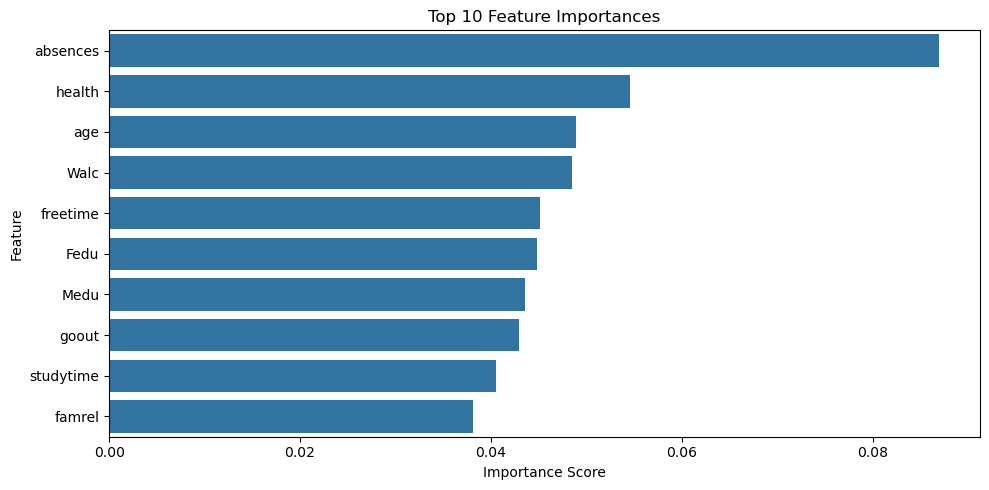

In [34]:
import numpy as np
import seaborn as sns

# Feature names (after one-hot encoding)
feature_names = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10
top_n = 10
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices][:top_n], y=feature_names[indices][:top_n])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

